# Packages/Libraries and Pandas 

Perhaps the most powerful way to code is to leverage work that other (often incredibly smart) people have already done!  Every language has ways to do this, and those methods typicaly involve installing third party __packages__ (sometimes called libraries)

Since we downloaded _anaconda_ in order to get Python on our machines, we already have a lot of third party packages installed (including pandas).  But if we wanted to install a third party package in our conda environment, you can do so by simply using the `conda install [PACKAGE NAME]` command in the terminal (osx) or conda prompt (windows).

When we want to use a third party package we must first `import` it like so:

In [1]:
import pandas

You can also _alias_ a package when you import it, which is simply giving it a different name.  This is often done to shorten the package name so when you need to reference it you don't need to type out the full name.  You will almost always see `pandas` imported like this:

In [2]:
import pandas as pd

With this syntax, we can reference panda by typing `pd` instead of `pandas`

## Pandas

Now that you know a little bit about third party packages, let's dig into `pandas` a bit more.  We're going to be sort of following along with the pandas 10 minute guide linked below.

[Pandas 10 minutes guide](https://pandas.pydata.org/docs/user_guide/10min.html)

### Data Structures

Pandas has 2 basic data structures:
- Series
  - A 1-dimensional array holding data of any single type
- Dataframe
  - A 2-dimensional structure which holds data in a tabular format like a table with rows and columns

#### Series
In some sense the `series` data type can be thought of sort of like a `list`.  It is a 1-dimensional array that can have a label - or name - attached to it.  The big difference between a `list` and a pandas `series` is that it is generally not considered best practice to iterate over any pandas objects or to access their elements by their ordinal indicies.  We instead access elements or ranges of elements in pandas objects using a named index, or by using built in pandas accessor methods like `loc` or `at`, which we will touch on later.

See below for an example of a `series`:

In [3]:
s = pd.Series(data = ['Apple', 'Banana', 'Grape', 'Kiwi'])
s

0     Apple
1    Banana
2     Grape
3      Kiwi
dtype: object

When we show the `series` in the cell output, we get a few pieces of information about it:
1. All of the values in the series
2. The indicies of the values in the series (0 through 3)
3. The dtype (data type) `object`

The `object` data type is one we haven't seen before.  It is a versatile type used for text data (strings), mixed-type columns, or when a column contains Python objects that don't fit other specific data types.

If we want to, we can also name a `series` by passing it a value for the option `name` argument:

In [4]:
s = pd.Series(data = ['Apple', 'Banana', 'Grape', 'Kiwi'], name = 'Fruits')
s

0     Apple
1    Banana
2     Grape
3      Kiwi
Name: Fruits, dtype: object

When we are just using the `series` the `name` argument can seem kind of frivilous, after all, we can name the series when we assign it to a variable, like above the "name" of the series can be thought of as `s` since that is the variable we store the `series` in.  When we begin working with the `dataframe` object, however, the value of the `name` becomes more apparent.  

#### Dataframe
A `dataframe` is a tabular data structure made up of pandas `series` objects.

![excel sheet](https://s3.amazonaws.com/libapps/accounts/1505/images/Excel_Example_1.jpg)

Think of a pandas `dataframe` like the above excel sheet.  It has columns (A, B, C, and D) and rows (1, 2, 3, 4, and 5).  Though, one of those rows is not really a row, right? Row 1 doesn't contain `values`, it contains `headers` (or names) which are labels for the values that are contained in the columns they are at the top of.

This is where the `name` attribute of a pandas series actually sees some use.  Since a pandas `dataframe` is simply a collection of pandas `series` objects!  If we are to use the above excel sheet image as an example, each column would be a pandas `series` where the value in row 1 would be the `name` of that `series`.  And the sheet itself would be the pandas `dataframe`.

Just because `dataframe` objects are made of `series` objects technically does not mean we need to use `series` objects to _create_ a `dataframe`.

In fact, one of the easiest ways is to use a `dictionary`!  In this case the `keys` represent the column names or headers, and the values represent the values for that column. 

Let's see an example.

In [5]:
data = {
    'name':['Thomas', 'Aaron', 'Amber', 'Ray'],
    'age':[12, 32, 40, 24],
    'job':[None, 'Data Analyst', 'Lawyer', 'Server']
}

df = pd.DataFrame(data)
df

,name,age,job
0,Thomas,12,None
1,Aaron,32,Data Analyst
2,Amber,40,Lawyer
3,Ray,24,Server


See how easy that was?  With pandas, you can organize and begin working with data incredibly quickly, and it makes it very easy and intuitive.

Now that we have our dataframe, there are a couple of things we'll want to do with it, to better understand the data that we have.  Let's first look at how to get all of the `data types` from the dataframe using the `dtypes` attribute.

In [6]:
df.dtypes

name    object
age      int64
job     object
dtype: object

Of course there are many more possible data types for our dataframes such as `datetime64` or `float64` etc. But for our purposes, there is no need to worry about all the possibilities for now, it is best to learn specifics when you have a specific use case, and focus on the basics when you are first learning.

#### Loading data

In order to understand the basics a bit more, let's get our hands on a bigger dataset.  In the data folder, there is a csv with flight data from [kaggle](https://www.kaggle.com/datasets/rohitgrewal/airlines-flights-data?resource=download)

In order to load a csv file into a pandas dataframe we use the `from_csv` method from the pandas package!

In [7]:
import os
os.getcwd()
flight_data = pd.read_csv(r"data\airlines_flights_data.csv")

Now, as you might be able to tell, this dataset is quite a bit larger than our 4-row one above.  Let's see exactly how large by checking the `shape` attribute on our new dataframe.

In [8]:
flight_data.shape

(300153, 12)

Wow, 300,000 rows!  That is quite a large dataset.  As you can imagine, with a dataset this large it can be difficult to get a good understanding of the data by just looking at it.  We are going to need to make use of a few descriptive methods that pandas makes available to us.  Let's first check the datatypes of all of the columns in our new dataset by checking the `dtypes` attribute.

In [9]:
flight_data.dtypes

index                 int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

Hmm alright, so it appears that we mostly have `object` data, with a few `int64` and `float64` columns as well.  Let's actually take a look at a few columns of data to get a quick look at what some of the values look like.  We peek at the first few rows of a large dataset using the `.head()` method on a dataframe, like so:

In [10]:
flight_data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Here we can take a look at the data we're dealing with a little more closely to get a better understanding of how we can work with it!  

There's a few interesting things in here, for instance we see the integer columns are:
- index
- days_left
- price

And the float column is 
- duration (presumably in hours)

looking at the actual values in these columns makes it easier to understand what they actually represent, as sometimes column names are not descriptive enough alone.

Since we have some numerical columns, we may want to get some summary statistics about them.  This is a good use case for the `.describe()` method which pandas gives us on dataframes.  This will populate lots of summary statistics like mean, median, and quartiles.

In [11]:
flight_data.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


#### Filtering datasets

Now, one thing we may find interesting at various points is to filter or select only particular types of records from our dataframe.  I know earlier I said it is bad practice to select records from a dataframe using their ordinal index (i.e. the number which corresponds to which record it is in the dataset), but sometimes in certain cases you may want to do so for one reason or another.  I would still recommend strongly against becoming reliant on iterating over the rows in a dataframe, or accessing records using their index, but it is still good to know how to do so.  

We took a look at the first 5 rows of the `flight_data` dataset above, but let's say we just wanted the second row.  How would we do that?

It's quite simple, in fact it a similar syntax to accesing the second element in a list using a slice!

In [12]:
flight_data[1:2]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


You might recall when we are accessing a slice of a list, we use two indicies, the `start` and the `stop`.  As you also should recall, the `stop` index is __not__ included in the result.  That is why we must past `1:2` in this case, because we start with one, and we stop with 2, but 2 is not included.  We can also use this syntax to return more rows by increasing the stop index:

In [13]:
flight_data[1:4]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955


This is helpful in certain circumstances, but there are much more powerful ways to filter a dataframe to only include records that you are interested in.

For instance, let's say we were doing an analysis on early morning flights only, and we wanted to look at just those flights.  We can do so by filtering the dataframe to only include records for which the `departure_time` field is equal to `Early_Morning` using the following syntax:

In [14]:
early_morning_flights = flight_data[flight_data['departure_time'] == 'Early_Morning']
early_morning_flights.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
12,12,Indigo,6E-5001,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5955
16,16,Air_India,AI-887,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.08,1,5955


This syntax appears kind of tricky at first, but essentially what you're doing is creating a `boolean` expression which is evaluated against every row in the dataframe, and if that expression evaluates to `False`, the row is excluded.  

In this case, the boolean expression is `flight_data['departure_time'] == 'Early_Morning'`, and we're feeding that into the `flight_data[ _ ]` brackets, which is how it gets applied to that dataframe!

#### Operations
Looking at the data here, there is a field which should probably be a numerical field, but is not.  The `stops` field appears to hold numerical data, but seems to have the numbers typed out as strings.  We should try to convert this to a numerical field to make it more useful to us!  

Since the numbers are actually typed out, we first need to see which numbers are present in our dataframe so we can map them to the correct integer values.  We can do so by using the `.unique()` method on the `stops` column.

In [15]:
print(flight_data['stops'].unique())

['zero' 'one' 'two_or_more']


Ahh, it looks like this field actually contains `categorical` data!  That's why we check these things, its important to be careful about making assumptions!  We don't want to convert this field to an integer because it would not be accurate to do so.  We have no way of knowing exactly how many stops there are for any of the flights listed as "two_or_more" stops, so we will leave this field as it is.  

We can, however, learn how to do `dataframe` operations using the `duration` and `price` fields, to calculate the __price per hour__ of each flight in the `dataframe`!

Creating a new data field in a `dataframe` is very easy.  We use the same syntax as adding an element to a dictionary, but instead of a value, we pass in a formula using either a combination of other `columns` or constants.  Pandas will then apply this expression to every row in the `dataframe` to populate the new column!

In [16]:
flight_data['price_per_hour'] = flight_data['price'] / flight_data['duration']
flight_data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,price_per_hour
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,2743.317972
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,2554.935622
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,2744.700461
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2646.666667
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2555.793991


You can see our new column all the way on the end there which now shows the average price per hour for each flight in the dataset!

(bonus tip, you can create a quick histogram of data by importing `matplotlib.pyplot` using the `.hist()` function!)

<Axes: >

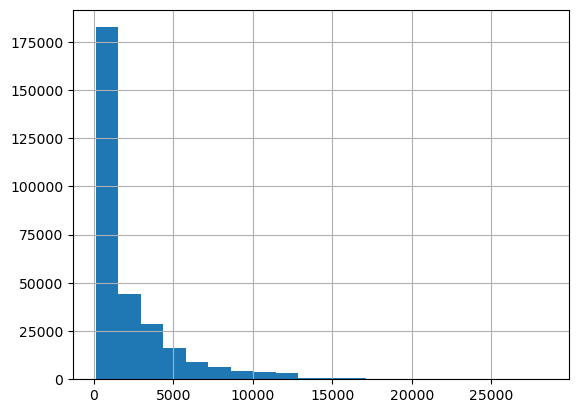

In [20]:
import matplotlib.pyplot as plt
flight_data['price_per_hour'].hist(bins=20)

This is far from a perfect graphic, but we will touch on visualization more in the project module at the end of the course!

#### Grouping
The last piece of pandas knowledge we will go over in this module is the grouping functionality.

If you're familiar with SQL you probably understand the way grouping works at a high level.  We want to take all of the records which match certain grouping criteria, and aggregate the values from those records together in some way.

What does that mean in plain english?

Let's say we wanted to know the average price of flights based on the number of `stops`.  How would we calculate something like that?  Using the `groupby` method of course!

In [24]:
flight_data.groupby("stops")["price"].mean()

stops
one            22900.992482
two_or_more    14113.450775
zero            9375.938535
Name: price, dtype: float64

Very simple, right?  Now, of course we can get much more complicated with our grouping.  

We can: 
- group by multiple columns
- aggregate more than one column
- create our own aggregate functions

Check out [this link](https://datascientyst.com/list-aggregation-functions-aggfunc-groupby-pandas/) for a list of all of the aggregate functions available to use with Pandas.

And much more.  For our purposes in this module though, we've covered all we need to know for now!

## Exercises
Q1: Using the `flight_data` dataframe, calculate the total number of flights from every `source_city` using `.groupby()`.

<details>
<summary>Hint</summary>
    
Try using the `.size()` function

<br>    
</details>

<details>
<summary>Answer</summary>

Code:<br>
```

```
<br>    
</details>
<br>

Q2: Create a new column called `flight_path` which concatenates the source and destination cities with a space in between them.
<details>
<summary>Answer</summary>

Code:<br>
```
flight_data['flight_path'] = flight_data['source_city'] + ' ' + flight_data['destination_city']
```
<br>    
</details>

In [ ]:
# Q1


In [ ]:
# Q2
